# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Zulfian Rahmadiansyah
- Email: zulfianbelajar@gmail.com
- Dibuat: Selasa, 12 September 2023 (11.15 AM)
- Selesai: Jumat, 15 September 2023 (2.30 AM)

## Menentukan Pertanyaan Bisnis

- Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir?
- Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?
- Bagaimana Demografi Pelanggan yang Kita Miliki?

## Menyiapkan semua library yang dibutuhkan

In [178]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [179]:
path = "https://raw.githubusercontent.com/zulfianrahma/Proyek-Analisis-Data_E-Commerce-Public-Dataset/main/E-Commerce%20Public%20Dataset%20(without%20Geolocation)"
list_files = ["customers_dataset.csv",
             "order_items_dataset.csv",
             "order_payments_dataset.csv",
             "order_reviews_dataset.csv",
              "orders_dataset.csv",
              "product_category_name_translation.csv",
              "products_dataset.csv",
              "sellers_dataset.csv"]

#### Memuat data *customers*

In [180]:
customers_df = pd.read_csv(os.path.join(path, list_files[0]))
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Memuat data *order_items*

In [181]:
order_items_df = pd.read_csv(os.path.join(path, list_files[1]))
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### Memuat data *order_payments*

In [182]:
order_payments_df = pd.read_csv(os.path.join(path, list_files[2]))
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### Memuat data *order_reviews*

In [183]:
order_reviews_df = pd.read_csv(os.path.join(path, list_files[3]))
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### Memuat data *orders*

In [184]:
orders_df = pd.read_csv(os.path.join(path, list_files[4]))
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### Memuat data *product_category_name_translation*

In [185]:
product_translation_df = pd.read_csv(os.path.join(path, list_files[5]))
product_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### Memuat data *products*

In [186]:
products_df = pd.read_csv(os.path.join(path, list_files[6]))
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### Memuat data *sellers*

In [187]:
sellers_df = pd.read_csv(os.path.join(path, list_files[7]))
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### Menilai data *customers*

* Melihat informasi pada data

In [188]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


* Melihat informasi terkait *missing values*

In [189]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Hasil di atas menunjukkan bahwa tidak terdapat *missing values* pada data

* Melihat informasi terkait duplikasi data

In [190]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


Hasil di atas menunjukkan bahwa tidak terdapat duplikasi pada data

#### Menilai data *order_items*

* Melihat informasi pada data

In [191]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


* Melihat informasi terkait *missing values*

In [192]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Hasil di atas menunjukkan bahwa tidak terdapat *missing values* pada data

* Melihat informasi terkait duplikasi data

In [193]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


Hasil di atas menunjukkan bahwa tidak terdapat duplikasi pada data

* Melihat parameter statistik pada data

In [194]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai data *order_payments*

* Melihat informasi pada data

In [195]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


* Melihat informasi terkait *missing values*

In [196]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Hasil di atas menunjukkan bahwa tidak terdapat *missing values* pada data

* Melihat informasi terkait duplikasi data

In [197]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


Hasil di atas menunjukkan bahwa tidak terdapat duplikasi pada data

* Melihat parameter statistik pada data

In [198]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Menilai data *order_reviews*

* Melihat informasi pada data

In [199]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Terdapat kesalahan tipe data untuk kolom *review_creation_date* & *review_answer_timestamp*.


Kedua kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (tipe data object digunakan untuk tipe data string).

* Melihat informasi terkait *missing values*

In [200]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Hasil di atas menunjukkan bahwa terdapat *missing values* pada kolom *review_comment_title* & *review_comment_message*.

* Melihat informasi terkait duplikasi data

In [201]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


Hasil di atas menunjukkan bahwa tidak terdapat duplikasi pada data

* Melihat parameter statistik pada data

In [202]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Menilai data *orders*

* Melihat informasi pada data

In [203]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Terdapat kesalahan tipe data untuk kolom *order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date,* & *order_estimated_delivery_date*.


Kolom - kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (tipe data object digunakan untuk tipe data string).

* Melihat informasi terkait *missing values*

In [204]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Hasil di atas menunjukkan bahwa terdapat *missing values* pada kolom *order_approved_at, order_delivered_carrier_date,* & *order_delivered_customer_date*.

* Melihat informasi terkait duplikasi data

In [205]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


Hasil di atas menunjukkan bahwa tidak terdapat duplikasi pada data

* Melihat parameter statistik pada data

In [206]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai data *product_category_name_translation*

* Melihat informasi pada data

In [207]:
product_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


* Melihat informasi terkait *missing values*

In [208]:
product_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

Hasil di atas menunjukkan bahwa tidak terdapat *missing values* pada data.

* Melihat informasi terkait duplikasi data

In [209]:
print("Jumlah duplikasi: ", product_translation_df.duplicated().sum())

Jumlah duplikasi:  0


Hasil di atas menunjukkan bahwa tidak terdapat duplikasi pada data

#### Menilai data *products*

* Melihat informasi pada data

In [210]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


* Melihat informasi terkait *missing values*

In [211]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Hasil di atas menunjukkan bahwa terdapat *missing values* pada semua kolom kecuali *product_id*.

* Melihat informasi terkait duplikasi data

In [212]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


Hasil di atas menunjukkan bahwa tidak terdapat duplikasi pada data

* Melihat parameter statistik pada data

In [213]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai data *sellers*

* Melihat informasi pada data

In [214]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


* Melihat informasi terkait *missing values*

In [215]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Hasil di atas menunjukkan bahwa tidak terdapat *missing values* pada data

* Melihat informasi terkait duplikasi data

In [216]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


Hasil di atas menunjukkan bahwa tidak terdapat duplikasi pada data

### Cleaning Data

Berdasarkan proses **Assessing Data** yang telah dilakukan sebelumnya, beberapa hal yang perlu dibersihkan (*cleaning*) pada data adalah berikut:

1. Data *order_reviews*:
- kesalahan tipe data (*review_creation_date & review_answer_timestamp*)
seharusnya tipe data datetime, bukan object
- terdapat missing values pada kolom *review_comment_title & review_comment_message*

2. Data *orders*:
- kesalahan tipe data (*order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date*)
seharusnya tipe data datetime, bukan object
- terdapat missing values pada kolom *order_approved_at, order_delivered_carrier_date, & order_delivered_customer_date*

3. Data *products*:
- terdapat missing values pada semua kolom kecuali kolom *product_id*



#### Membersihkan data *order_reviews*

Data *order_reviews*:
- kesalahan tipe data (*review_creation_date & review_answer_timestamp*)
seharusnya tipe data datetime, bukan object
- terdapat missing values pada kolom *review_comment_title & review_comment_message*

##### 1. Memperbaiki tipe data

- Mengganti tipe data pada kolom *review_creation_date & review_answer_timestamp* menjadi datetime menggunakan fungsi **to_datetime()**

In [217]:
order_reviews_datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in order_reviews_datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

- Memeriksa kembali informasi terkait data

In [218]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


- Melihat 5 baris teratas pada data

In [219]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


##### 2. *Missing values*

- Melihat informasi pada data

In [220]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


- Melihat jumlah *missing values* pada data

In [221]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Berdasarkan hasil di atas, diketahui bahwa ternyata cukup banyak missing values pada kolom *review_comment_title* dan *review_comment_message*.

- Melihat data yang dimiliki oleh kolom *review_comment_title* dengan *missing values*

In [222]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


- Melihat data yang dimiliki oleh kolom *review_comment_message* dengan *missing values*

In [223]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42


Berdasarkan hasil - hasil di atas, diketahui bahwa ternyata masih banyak informasi penting yang dimiliki oleh baris yang memuat *missing values*.

Secara umum terdapat tiga metode untuk mengatasi missing value yaitu **dropping, imputation, dan interpolation**.

Kebetulan, data yang memuat *missing values* adalah informasi berupa tulisan atau *review* dari konsumen yang bersifat kualitatif dan cenderung digunakan untuk analisis sentimen. Sedangkan, terdapat informasi *review_score* yang memuat nilai *review* dari konsumen (kuantitatif) dan sudah mewakili penilaian *review* dari konsumen.

Oleh sebab itu, kolom yang memuat *missing values* (*review_comment_title* & *review_comment_message*) dapat dihilangkan (*dropping*) karena sudah diwakilkan oleh kolom *review_score*

- Melakukan proses *dropping* pada kolom yang telah ditentukan

In [224]:
columns_to_drop = ['review_comment_title', 'review_comment_message']
order_reviews_df = order_reviews_df.drop(columns_to_drop, axis=1)

- Melihat informasi pada data

In [225]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


- Melihat jumlah *missing values* pada data

In [226]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

#### Membersihkan data *orders*

Data *orders*:
- kesalahan tipe data (*order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date*)
seharusnya tipe data datetime, bukan object
- terdapat missing values pada kolom *order_approved_at, order_delivered_carrier_date, & order_delivered_customer_date*

##### 1. Memperbaiki tipe data

- Mengganti tipe data pada kolom yang telah ditentukan (*order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date*) menjadi datetime menggunakan fungsi **to_datetime()**

In [227]:
orders_datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in orders_datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

- Memeriksa kembali informasi terkait data

In [228]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


- Melihat 5 baris teratas pada data

In [229]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


##### 2. *Missing values*

- Melihat informasi pada data

In [230]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


- Melihat jumlah *missing values* pada data

In [231]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Berdasarkan hasil di atas, diketahui bahwa ternyata cukup banyak *missing values* yang dimuat. Namun, jumlah tidak dapat dilakukan proses **imputation** atau **interpolation** berhubung informasi *missing values* tersebut berkaitan dengan waktu.

Selain itu, jumlah *missing value* tersebut juga relatif sedikit jika dibandingkan dengan keseluruhan data yang tersedia.

Oleh sebab itu, dilakukan proses *dropping* pada baris yang memuat *missing values*.

- Melakukan proses *dropping* baris yang memuat *missing values*

In [232]:
orders_df.dropna(axis=0, inplace=True)

- Melihat informasi pada data

In [233]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


- Melihat jumlah *missing values* pada data

In [234]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### Membersihkan data *products*

Data *products*:
- terdapat missing values pada semua kolom kecuali kolom *product_id*

##### 1. *Missing values*

- Melihat informasi pada data

In [235]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


- Melihat jumlah *missing values* pada data

In [236]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Berdasarkan hasil di atas, diketahui bahwa ternyata jumlah *missing value* yang ada relatif sedikit jika dibandingkan dengan keseluruhan data yang tersedia.

Oleh sebab itu, dilakukan proses *dropping* pada baris yang memuat *missing values*.

- Melakukan proses *dropping* baris yang memuat *missing values*

In [237]:
products_df.dropna(axis=0, inplace=True)

- Melihat informasi pada data

In [238]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


- Melihat jumlah *missing values* pada data

In [239]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Exploratory Data Analysis (EDA)

#### Eksplorasi data *customers*

- Melihat 5 sampel data _customers_df_

In [240]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
14207,4c51b75b3a2ff33ddff3bbc56afc0d80,d8e0cfd430ff4e8baafe5fc523ff2dd0,98700,ijui,RS
35804,0dda46eaed5bee4363ebcf8e92346c10,5e3e104c632be6607c4e66bbfad5556a,81050,curitiba,PR
52241,5dde09cc77f38cbb0ca8360d5702b81e,e759f5e4fc94ffa32b74c2e3cbe01e11,58063,joao pessoa,PB
67299,989a5ea2f3bf07abf7dad6d1c800565e,3633988b70e4c4788e02277855aa0ca1,5438,sao paulo,SP
21505,50aef86314536113cf37ab64f241ef8d,59480732845d7411f4a2406a563c878e,22783,rio de janeiro,RJ


- Melihat rangkuman parameter statistik dari data *customers_df* menggunakan metode **describe()**.

In [241]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


- Melihat persebaran jumlah pelanggan berdasarkan kota (*city*) menggunakan metode **groupby()**.

In [242]:
customers_df.groupby(by="customer_city").customer_unique_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         14984
rio de janeiro     6620
belo horizonte     2672
brasilia           2069
curitiba           1465
                  ...  
ibertioga             1
ibiajara              1
ibiara                1
ibicuitinga           1
lagoao                1
Name: customer_unique_id, Length: 4119, dtype: int64

Berdasarkan hasil di atas, dapat dilihat bahwa persebaran pelanggan kita paling banyak berasal dari kota Sao Paulo (14984 pelanggan), diikuti dengan kota Rio de Janeiro (6620 pelanggan).

- Melihat persebaran jumlah pelanggan berdasarkan negara bagian (*state*) menggunakan metode **groupby()**.

In [243]:
customers_df.groupby(by="customer_state").customer_unique_id.nunique().sort_values(ascending=False)

customer_state
SP    40302
RJ    12384
MG    11259
RS     5277
PR     4882
SC     3534
BA     3277
DF     2075
ES     1964
GO     1952
PE     1609
CE     1313
PA      949
MT      876
MA      726
MS      694
PB      519
PI      482
RN      474
AL      401
SE      342
TO      273
RO      240
AM      143
AC       77
AP       67
RR       45
Name: customer_unique_id, dtype: int64

Berdasarkan hasil di atas, dapat dilihat bahwa persebaran pelanggan kita paling banyak berasal dari negara bagian SP (40302 pelanggan).

#### Eksplorasi data *order_items* dan *order_payments*

- Melihat rangkuman parameter statistik dari data *order_items*

In [244]:
order_items_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


- Melihat rangkuman parameter statistik dari data *order_payments*

In [245]:
order_payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


- Melihat 5 sampel data *order_payments*

In [246]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
59963,e18be83c4a3b99b4eab98b64ae5bee5b,1,credit_card,2,42.76
85325,00f98eaeddb9debc8df8cb27e08216d4,1,boleto,1,60.94
8148,74c8fc29ba64bb72272c8025c00bb85e,1,credit_card,10,212.95
18061,4c05288ce87fd35acbaa04fec7070339,1,boleto,1,116.94
89477,92cac3c69ca34e5fa1b54e0fd64de09e,1,credit_card,4,198.00


- Memperoleh informasi terkait jumlah pada tiap jenis metode pembayaran

In [247]:
order_payments_df.groupby(by="payment_type").order_id.count()

payment_type
boleto         19784
credit_card    76795
debit_card      1529
not_defined        3
voucher         5775
Name: order_id, dtype: int64

- Membuat sebuah kolom baru bernama “status_payment” pada data _order_items_ untuk mengidentifikasi _items_ yang sudah dan belum terbayarkan

In [248]:
order_id_in_order_payments_df =  order_payments_df.order_id.tolist()
order_items_df["status_payment"] = order_items_df["order_id"].apply(lambda x: "Paid" if x in order_id_in_order_payments_df else "Not yet paid")
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,status_payment
37249,5485b7aec242643d6d20665586e616e0,1,b19802c584b8a6d131cf6e31628f7f84,c794dab4928dd97beb41d05514441e86,2018-06-26 03:57:39,115.70,8.97,Paid
64678,93c781a8790c89bac596f6ff7d924c73,1,333789d98505fa09e6e270b62360996e,b499c00f28f4b7069ff6550af8c1348a,2018-07-09 10:30:51,69.99,23.29,Paid
83988,becf90dbbea6e1a229814dab50912be4,2,5fc3e6a4b52b0c414458104ed4037f1c,229c3efbfb0ea2058de4ccdfbc3d784a,2017-05-12 19:05:23,89.00,17.12,Paid
39035,58b178ec22e2b12ab0757e446b2ec4fd,2,6522b16614da30655a6a5ce4c8f2fb8b,7d456afc660226829370f3173d14520c,2018-03-26 07:08:04,72.00,14.43,Paid
19037,2bb6b9ebbb0ae5423d46be8e62e09538,5,b0961721fd839e9982420e807758a2a6,1f50f920176fa81dab994f9023523100,2017-10-03 09:49:46,59.90,17.67,Paid


- Memperoleh informasi terkait jumlah pada tiap status pembayaran

In [249]:
order_items_df.groupby(by="status_payment").order_id.count()

status_payment
Not yet paid         3
Paid            112647
Name: order_id, dtype: int64

- Melakukan merge terhadap *order_items* dan *order_payments*

In [250]:
order_items_payments_df = pd.merge(
    left=order_items_df,
    right=order_payments_df,
    how="outer",
    left_on="order_id",
    right_on="order_id"
)
order_items_payments_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,status_payment,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,Paid,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1.0,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,Paid,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1.0,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,Paid,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1.0,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,Paid,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,Paid,1.0,credit_card,3.0,218.04


#### Eksplorasi data *order_reviews* dan *orders*

- Melihat rangkuman parameter statistik dari data *order_reviews*

In [251]:
order_reviews_df.describe(include='all')

<ipython-input-251-c9ee164f82fa>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_reviews_df.describe(include='all')
<ipython-input-251-c9ee164f82fa>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_reviews_df.describe(include='all')


,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224
unique,98410,98673,NaN,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,463,4
first,NaN,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
last,NaN,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35
mean,NaN,NaN,4.086421,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN


- Melihat rangkuman parameter statistik dari data *orders*

In [252]:
orders_df.describe(include='all')

<ipython-input-252-caf441259110>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include='all')
<ipython-input-252-caf441259110>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include='all')
<ipython-input-252-caf441259110>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include='all')
<ipython-input-252-caf441259110>:1: FutureW

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461,96461,96461,96461
unique,96461,96461,2,95939,88272,80100,95649,445
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96455,3,9,47,3,507
first,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
last,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


- Memperoleh informasi terkait jumlah pada tiap status pembelian

In [253]:
orders_df.groupby(by="order_status").order_id.count()

order_status
canceled         6
delivered    96455
Name: order_id, dtype: int64

- Melakukan merge terhadap *order_reviews* dan *orders*

In [254]:
order_reviews_orders_df = pd.merge(
    left=order_reviews_df,
    right=orders_df,
    how="right",
    left_on="order_id",
    right_on="order_id"
)
order_reviews_orders_df.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,8d5266042046a06655c8db133d120ba5,53cdb2fc8bc7dce0b6741e2150273451,4.0,2018-08-08,2018-08-08 18:37:50,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,e73b67b67587f7644d5bd1a52deb1b01,47770eb9100c2d0c44946d9cf07ec65d,5.0,2018-08-18,2018-08-22 19:07:58,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,359d03e676b3c069f62cadba8dd3f6e8,949d5b44dbf5de918fe9c16f97b45f8a,5.0,2017-12-03,2017-12-05 19:21:58,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,e50934924e227544ba8246aeb3770dd4,ad21c59c0840e6cb83a9ceb5573f8159,5.0,2018-02-17,2018-02-18 13:02:51,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


#### Eksplorasi data *order_items*, *order_payments*, *order_reviews*, dan *orders*

- Melakukan merge terhadap *order_items*, *order_payments*, *order_reviews*, dan *orders*

In [255]:
orders_all_df = pd.merge(
    left=order_reviews_orders_df,
    right=order_items_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_all_df.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_id,seller_id,shipping_limit_date,price,freight_value,status_payment,payment_sequential,payment_type,payment_installments,payment_value
0,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Paid,1.0,credit_card,1.0,18.12
1,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Paid,3.0,voucher,1.0,2.00
2,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Paid,2.0,voucher,1.0,18.59
3,8d5266042046a06655c8db133d120ba5,53cdb2fc8bc7dce0b6741e2150273451,4.0,2018-08-08,2018-08-08 18:37:50,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,...,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Paid,1.0,boleto,1.0,141.46
4,e73b67b67587f7644d5bd1a52deb1b01,47770eb9100c2d0c44946d9cf07ec65d,5.0,2018-08-18,2018-08-22 19:07:58,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,...,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Paid,1.0,credit_card,3.0,179.12


- Memperoleh informasi terkait jumlah pada tiap *review_score*

In [256]:
orders_all_df.groupby(by="review_score").order_id.count()

review_score
1.0    13121
2.0     3898
3.0     9649
4.0    22145
5.0    66032
Name: order_id, dtype: int64

- Memperoleh informasi terkait jumlah pada tiap *order_status*

In [257]:
orders_all_df.groupby(by="order_status").order_id.count()

order_status
canceled          7
delivered    115699
Name: order_id, dtype: int64

- Memperoleh informasi terkait jumlah pada tiap jenis metode pembayaran

In [258]:
orders_all_df.groupby(by="payment_type").order_id.count()

payment_type
boleto         22490
credit_card    85371
debit_card      1661
voucher         6181
Name: order_id, dtype: int64

#### Eksplorasi data *customers*, *sellers*, dan *orders_all*

* membuat sebuah kolom baru bernama “status” pada data _customers_df_ untuk mengidentifikasi pelanggan yang belum pernah melakukan order

In [259]:
customer_id_in_orders_all_df =  orders_all_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_all_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
87782,0f218a0d9827580aaab2d6b9a6fe03fa,72ae076cbb080298d6d6d04ff68304d7,81130,curitiba,PR,Active
52152,3083eb7eb7faf63e84cc78dfbd011e2f,3413f9bca7b61d654f1da9a0afd68c7b,66093,belem,PA,Active
37225,f6684db0118cdcdbe308f6de0287035c,a652ad91bdba3ce3abd71247744e3395,5758,sao paulo,SP,Active
39771,1ac89e859c3f29c79cbf991d0a8a04d9,702843d007357400ece1b13cc1126fd8,21071,rio de janeiro,RJ,Active
40768,af7a3089208b3025628fce28d1d4576c,91a8b965bb2d34b3e586844dc4a40d1b,7133,guarulhos,SP,Active


* memperoleh informasi terkait jumlah pelanggan yang berstatus “Active” dan “Non Active”

In [260]:
customers_df.groupby(by="status").customer_id.count()

status
Active        96461
Non Active     2980
Name: customer_id, dtype: int64

* melakukan merge terhadap data *orders_df* dan *customers_df*.

In [261]:
orders_all_customers_df = pd.merge(
    left=orders_all_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_all_customers_df.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,status_payment,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,Paid,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,Paid,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
2,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,Paid,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
3,8d5266042046a06655c8db133d120ba5,53cdb2fc8bc7dce0b6741e2150273451,4.0,2018-08-08,2018-08-08 18:37:50,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,...,Paid,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
4,e73b67b67587f7644d5bd1a52deb1b01,47770eb9100c2d0c44946d9cf07ec65d,5.0,2018-08-18,2018-08-22 19:07:58,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,...,Paid,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active


- Melihat informasi terkait hasil merge yang dihasilkan pada data *orders_all_customers_df*

In [262]:
orders_all_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115706 entries, 0 to 115705
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   review_id                      114845 non-null  object        
 1   order_id                       115706 non-null  object        
 2   review_score                   114845 non-null  float64       
 3   review_creation_date           114845 non-null  datetime64[ns]
 4   review_answer_timestamp        114845 non-null  datetime64[ns]
 5   customer_id                    115706 non-null  object        
 6   order_status                   115706 non-null  object        
 7   order_purchase_timestamp       115706 non-null  datetime64[ns]
 8   order_approved_at              115706 non-null  datetime64[ns]
 9   order_delivered_carrier_date   115706 non-null  datetime64[ns]
 10  order_delivered_customer_date  115706 non-null  datetime64[ns]
 11  

* melakukan merge terhadap data *orders_all_customers_df* dan *sellers_df*.

In [263]:
orders_all_customers_sellers_df = pd.merge(
    left=orders_all_customers_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
orders_all_customers_sellers_df.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,seller_zip_code_prefix,seller_city,seller_state
0,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,9350,maua,SP
1,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,9350,maua,SP
2,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,9350,maua,SP
3,8d5266042046a06655c8db133d120ba5,53cdb2fc8bc7dce0b6741e2150273451,4.0,2018-08-08,2018-08-08 18:37:50,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,...,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active,31570,belo horizonte,SP
4,e73b67b67587f7644d5bd1a52deb1b01,47770eb9100c2d0c44946d9cf07ec65d,5.0,2018-08-18,2018-08-22 19:07:58,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,...,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active,14840,guariba,SP


* membuat pivot table untuk memperoleh informasi terkait jumlah order berdasarkan kota

In [264]:
orders_all_customers_sellers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15044
1,rio de janeiro,6603
2,belo horizonte,2697
3,brasilia,2071
4,curitiba,1489
5,campinas,1406
6,porto alegre,1341
7,salvador,1188
8,guarulhos,1143
9,sao bernardo do campo,911


* membuat pivot table untuk memperoleh informasi terkait jumlah order berdasarkan state

In [265]:
orders_all_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

customer_state
SP    40489
RJ    12351
MG    11352
RS     5342
PR     4923
SC     3547
BA     3256
DF     2080
ES     1995
GO     1957
PE     1593
CE     1278
PA      946
MT      886
MA      716
MS      701
PB      517
PI      476
RN      474
AL      397
SE      335
TO      274
RO      243
AM      145
AC       80
AP       67
RR       41
Name: order_id, dtype: int64

* membuat pivot table untuk memperoleh informasi terkait jumlah order berdasarkan metode pembayaran

In [266]:
orders_all_customers_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    74302
boleto         19177
voucher         3679
debit_card      1484
Name: order_id, dtype: int64

* membuat pivot table untuk memperoleh informasi terkait jumlah penjual berdasarkan kota

In [267]:
orders_all_customers_sellers_df.groupby(by="seller_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,seller_city,order_id
0,sao paulo,24032
1,ibitinga,6446
2,curitiba,2671
3,santo andre,2635
4,belo horizonte,2347
5,rio de janeiro,2113
6,guarulhos,2027
7,ribeirao preto,1965
8,sao jose do rio preto,1942
9,maringa,1836


* membuat pivot table untuk memperoleh informasi terkait jumlah penjual berdasarkan state

In [268]:
orders_all_customers_sellers_df.groupby(by="seller_state").order_id.nunique().sort_values(ascending=False)

seller_state
SP    68625
MG     7734
PR     7510
RJ     4230
SC     3602
RS     1962
DF      808
BA      550
GO      451
PE      403
MA      389
ES      310
MT      136
CE       87
RN       51
MS       49
PB       35
RO       14
PI       11
SE        9
PA        8
AM        3
Name: order_id, dtype: int64

#### Eksplorasi data *product_category_name_translation* dan *products*

- Melihat 5 sampel data _product_category_name_translation_

In [269]:
product_translation_df.sample(5)

,product_category_name,product_category_name_english
36,construcao_ferramentas_ferramentas,costruction_tools_tools
8,telefonia,telephony
60,la_cuisine,la_cuisine
48,livros_interesse_geral,books_general_interest
49,construcao_ferramentas_seguranca,construction_tools_safety


- Melihat 5 sampel data _products_

In [270]:
products_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
10420,154e46f42e5665a0af25d2fc7c9e3321,esporte_lazer,34.0,569.0,1.0,478.0,49.0,10.0,25.0
16423,ea15d7ef3399e16b992e190d22dd3fd3,beleza_saude,60.0,919.0,1.0,150.0,22.0,3.0,15.0
19671,8f220439e328e0c1b68510c238d07e86,automotivo,51.0,670.0,3.0,6500.0,20.0,20.0,20.0
13309,edd087ed331c3ce178ec3489b9ecf117,livros_tecnicos,55.0,2138.0,1.0,2450.0,20.0,30.0,22.0
7055,d5151727942c39a516b56c3e21a8bf63,informatica_acessorios,33.0,826.0,3.0,850.0,17.0,20.0,17.0


- Melakukan merge terhadap *product_category_name_translation* dan *products*

In [271]:
products_all_df = pd.merge(
    left=product_translation_df,
    right=products_df,
    how="right",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_all_df.head()

,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,perfumaria,perfumery,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,artes,art,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,esporte_lazer,sports_leisure,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,bebes,baby,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,utilidades_domesticas,housewares,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0


- Melihat rangkuman parameter statistik dari data *customers_df* menggunakan metode **describe()**.

In [272]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
count,99441,99441,99441.000000,99441,99441,99441
unique,99441,96096,NaN,4119,27,2
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP,Active
freq,1,17,NaN,15540,41746,96461
mean,NaN,NaN,35137.474583,NaN,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN,NaN


#### Eksplorasi data *all_df*

* membuat sebuah DataFrame baru bernama _all_df_ untuk menampung semua informasi dari semua tabel yang kita miliki.

In [273]:
all_df = pd.merge(
    left=orders_all_customers_sellers_df,
    right=products_all_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
all_df.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_state,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,SP,utilidades_domesticas,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,SP,utilidades_domesticas,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,SP,utilidades_domesticas,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,8d5266042046a06655c8db133d120ba5,53cdb2fc8bc7dce0b6741e2150273451,4.0,2018-08-08,2018-08-08 18:37:50,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,...,SP,perfumaria,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0
4,e73b67b67587f7644d5bd1a52deb1b01,47770eb9100c2d0c44946d9cf07ec65d,5.0,2018-08-18,2018-08-22 19:07:58,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,...,SP,automotivo,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0


- Melihat informasi pada data *all_df*

In [274]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115706 entries, 0 to 115705
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   review_id                      114845 non-null  object        
 1   order_id                       115706 non-null  object        
 2   review_score                   114845 non-null  float64       
 3   review_creation_date           114845 non-null  datetime64[ns]
 4   review_answer_timestamp        114845 non-null  datetime64[ns]
 5   customer_id                    115706 non-null  object        
 6   order_status                   115706 non-null  object        
 7   order_purchase_timestamp       115706 non-null  datetime64[ns]
 8   order_approved_at              115706 non-null  datetime64[ns]
 9   order_delivered_carrier_date   115706 non-null  datetime64[ns]
 10  order_delivered_customer_date  115706 non-null  datetime64[ns]
 11  

* Melihat preferensi pembelian berdasarkan kategori barang

In [275]:
all_df.groupby(by="product_category_name_english").agg({
    "order_item_id": "sum",
    "price": "sum"
})

,order_item_id,price
product_category_name_english,,
agro_industry_and_commerce,309.0,81877.58
air_conditioning,359.0,54260.98
art,213.0,24176.63
arts_and_craftmanship,26.0,1814.01
audio,398.0,52382.37
...,...,...
stationery,2867.0,232111.63
tablets_printing_image,93.0,7840.31
telephony,5220.0,325566.88


Berdasarkan hasil di atas, terlihat bahwa kategori barang yang paling laris terjual adalah **bed_bath_table**, yaitu sebanyak 14602 item. Sedangkan, untuk kategori barang yang mempunyai total hasil penjualan tertinggi adalah **health_beauty** sebanyak $1275856.38.

* Melihat preferensi pembelian berdasarkan kota.

In [276]:
all_df.groupby(by=['customer_city', 'product_category_name_english']).agg({
    "order_item_id": "sum",
    "price": "sum"
})

order_item_id   price
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest                   1.0   39.90
                    cool_stuff                               1.0  199.00
                    sports_leisure                           1.0  120.00
abadiania           small_appliances                         1.0  949.99
abaete              baby                                     1.0   65.00
...                                                          ...     ...
ze doca             food_drink                               1.0   65.00
                    garden_tools                             1.0   39.90
                    musical_instruments                      1.0  359.00
                    sports_leisure                           1.0  149.90
zortea              computers_accessories                    1.0   69.90

[24891 rows x 2 columns]

Berdasarkan hasil di atas, terlihat bahwa kategori barang yang terjual pada setiap kota berbeda - beda.

- Menyimpan data *all_df* dalam berkas csv

In [277]:
all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir?

* Mengubah frekuensi data untuk memperoleh informasi terkait jumlah order dan total revenue yang diperoleh setiap bulannya.

In [278]:
monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()

monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

monthly_orders_df.head()

,order_purchase_timestamp,order_count,revenue
0,2016-09,1,134.97
1,2016-10,270,42422.66
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,748,121294.92


* Membuat line chart terkait jumlah order per bulan.

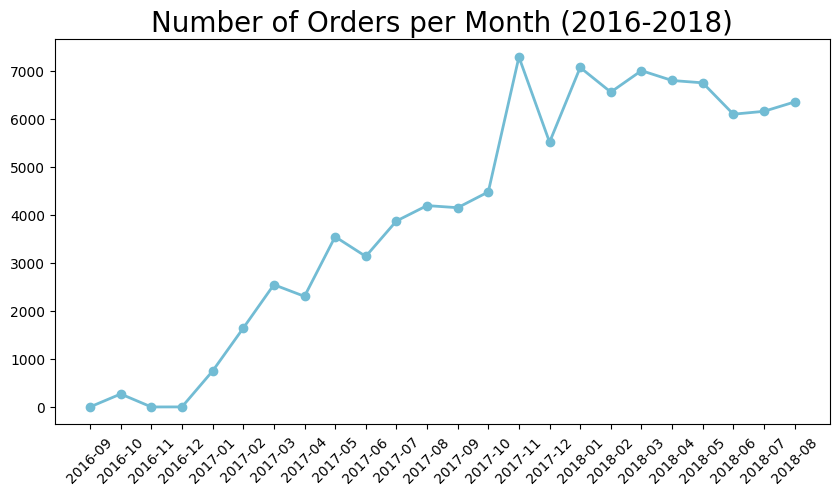

In [279]:
monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m') #mengubah format order date menjadi nama bulan

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month (2016-2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

Berdasarkan visualisasi di atas, kita dapat melihat bahwa jumlah order terbanyak terjadi pada bulan November 2017. Selain itu, kita juga dapat melihat adanya penurunan jumlah order pada bulan April, Juni, Desember 2017 dan Februari 2018.

* Membuat line chart terkait revenue per bulan.

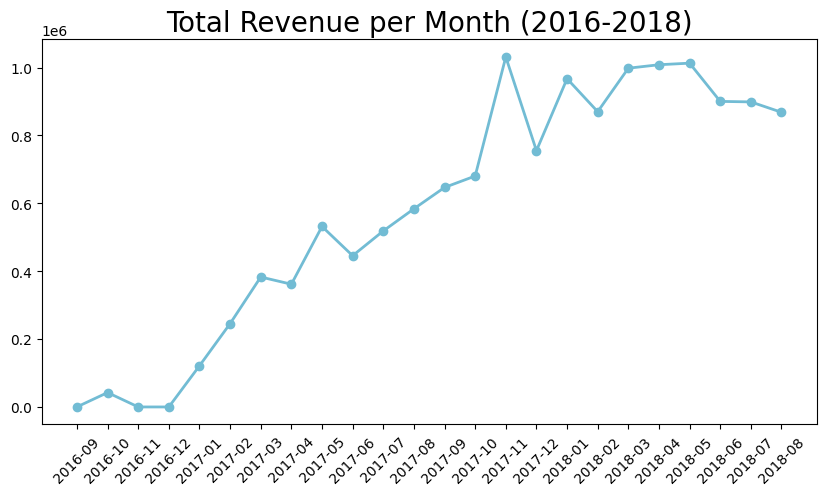

In [280]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month (2016-2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

Beberapa penurunan jumlah orderan pada bulan April, Juni, Desember 2017 dan Februari 2018 berdampak terhadap penurunan revenue perusahaan. Penurunan paling signifikan terjadi pada Desember 2017.

Normalnya, kita harus mencari tahu penyebab terjadinya penurunan tersebut dengan mempertimbangkan banyak hal, seperti keberadaan kompetitor, campaign, dll. Namun, untuk studi kasus ini, kita tidak memiliki cukup informasi terkait hal tersebut.

### Pertanyaan 2: Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

* Membuat sebuah DataFrame baru guna menampung informasi terkait jumlah penjualan tiap produk.

In [281]:
sum_order_items_df = all_df.groupby("product_category_name_english").order_item_id.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

,product_category_name_english,order_item_id
0,bed_bath_table,14602.0
1,furniture_decor,11928.0
2,health_beauty,11250.0
3,sports_leisure,10109.0
4,computers_accessories,10043.0
5,housewares,9324.0
6,watches_gifts,6682.0
7,garden_tools,6018.0
8,telephony,5220.0
9,auto,4953.0


* Membuat dua buah visualisasi data dalam satu gambar visual untuk mempermudah orang lain dalam mengidentifikasi produk dengan performa terbaik dan terburuk

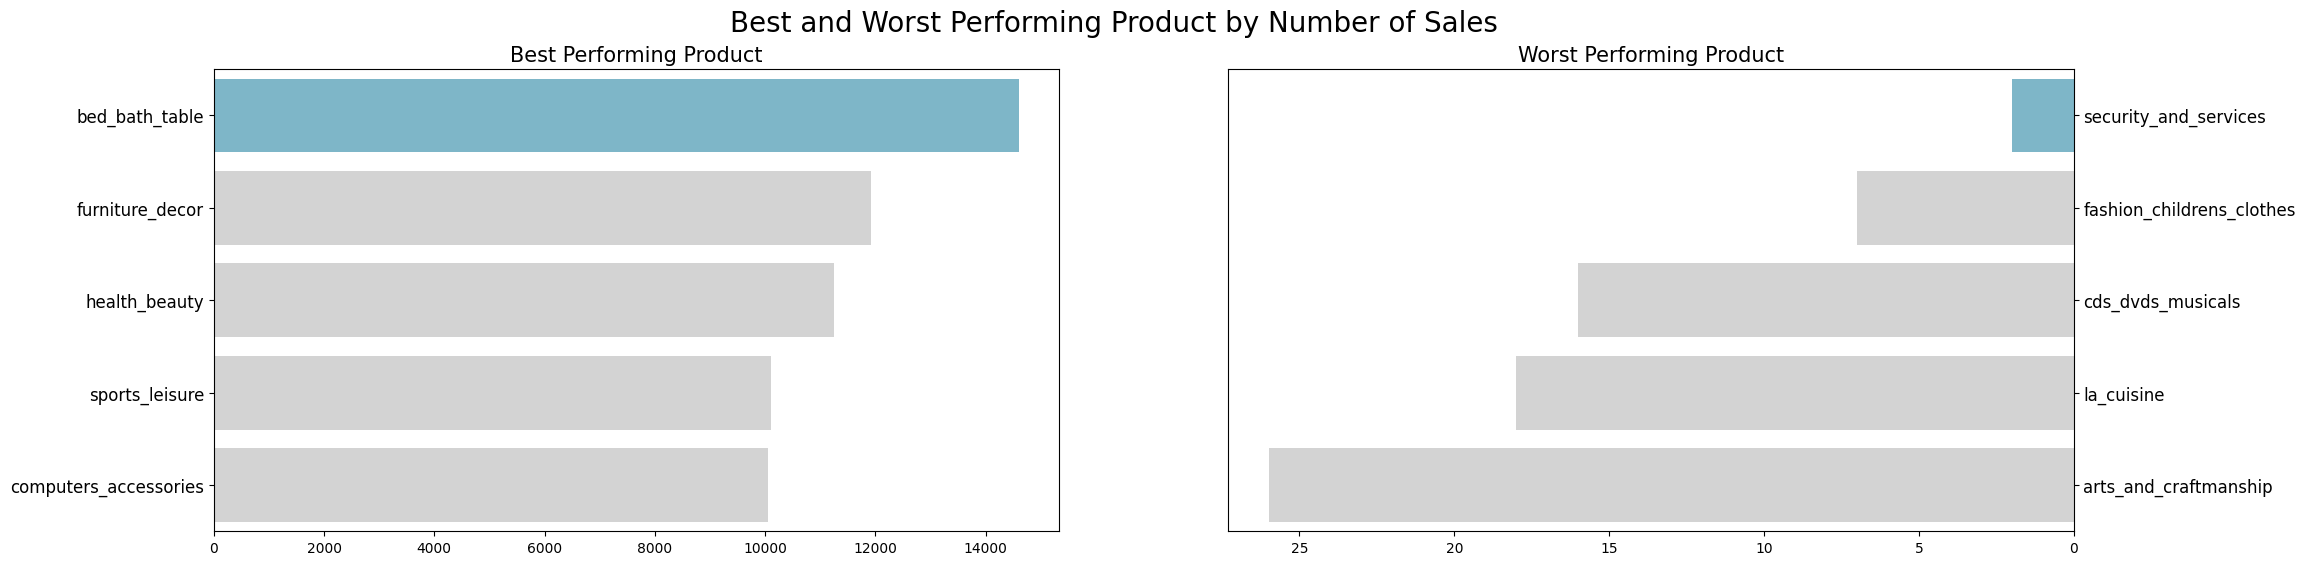

In [282]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

Berdasarkan gambar di atas, Anda dapat melihat bahwa produk **bed_bath_table** merupakan produk yang paling laris. Kontras dengan hal tersebut, produk **security_and_services** merupakan produk yang paling sedikit terjual.  

### Pertanyaan 3: Bagaimana Demografi Pelanggan yang Kita Miliki?

* Membuat DataFrame baru untuk menampung informasi terkait jumlah pelanggan untuk demografi berdasarkan metode pembayaran

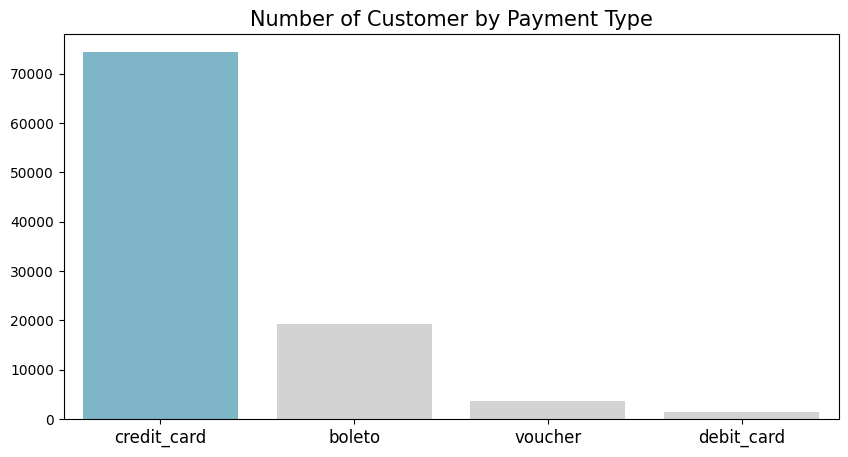

In [283]:
bypayment_df = all_df.groupby(by="payment_type").customer_id.nunique().reset_index()
bypayment_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count",
    x="payment_type",
    data=bypayment_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by Payment Type", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan gambar di atas, diketahui bahwa kebanyakan pelanggan menggunakan kartu kredit sebagai metode pembayaran.

* Membuat DataFrame baru untuk menampung informasi terkait jumlah pelanggan untuk demografi berdasarkan *review_score* yang diberikan

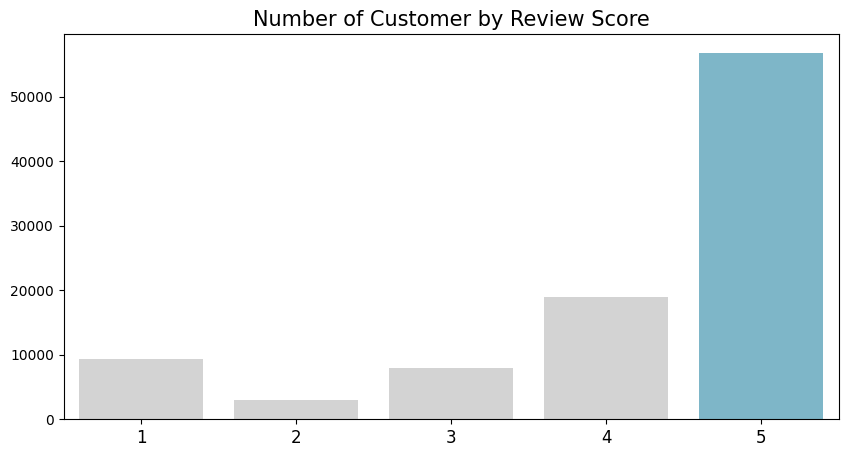

In [284]:
byrating_df = all_df.groupby(by="review_score").customer_id.nunique().reset_index()
byrating_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

byrating_df['review_score'] = pd.Categorical(byrating_df['review_score'], [1, 2, 3, 4, 5])

colors_ = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3",  "#72BCD4"]

plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count",
    x="review_score",
    data=byrating_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by Review Score", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

pelanggan yang kita miliki mayoritas memberikan nilai review tertinggi dengan poin 5.

* Membuat DataFrame baru untuk menampung informasi terkait jumlah pelanggan untuk demografi berdasarkan kota

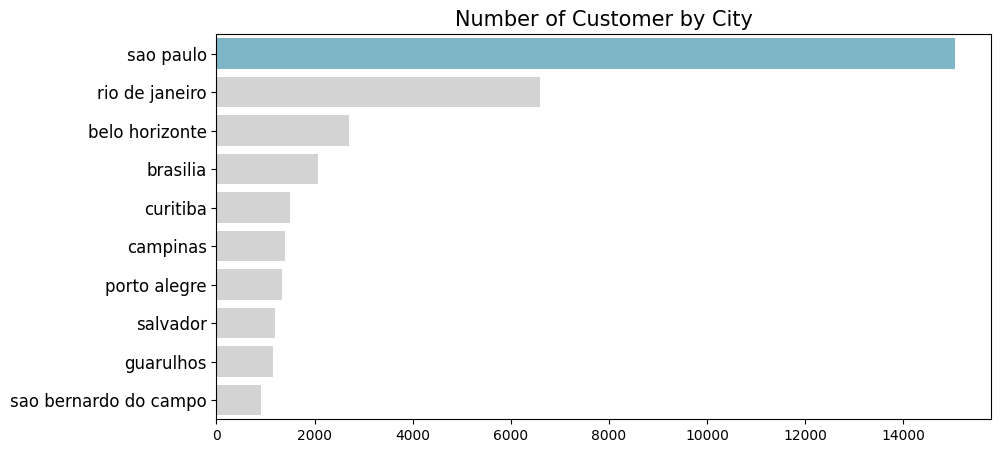

In [285]:
bycity_df = all_df.groupby(by="customer_city").customer_id.nunique().reset_index()
bycity_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bycity_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="customer_city",
    data=bycity_df.sort_values(by="customer_count", ascending=False).head(10),
    palette=colors_
)
plt.title("Number of Customer by City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Berdasarkan visualisasi data tersebut, dapat diketahui bahwa pelanggan yang kita miliki paling banyak berasal dari kota Sao Paulo

## Conclusion

- Jumlah order terbanyak terjadi pada bulan November 2017 (revenue tertinggi). Sedangkan, penurunan jumlah order terjadi pada bulan April, Juni, Desember 2017 dan Februari 2018 (penurunan revenue).


- Produk **bed_bath_table** merupakan produk yang paling laris. Kontras dengan hal tersebut, produk **security_and_services** merupakan produk yang paling sedikit terjual.


- Demografi pelanggan yang dimiliki dapat dikelompokkan menjadi beberapa kategori berikut:
  - Berdasarkan metode pembayarannya, pelanggan paling banyak menggunakan kartu kredit sebagai metode pembayarannya.
  - Berdasarkan *review_score* yang diberikan, pelanggan memberikan penilaian yang positif dengan mayoritas memberikan nilai tertinggi (skor 5)
  - Berdasarkan kota tempat tinggal, pelanggan terbanyak berasal dari Kota Sao Paulo.